<a href="https://colab.research.google.com/github/drewkostelecky/lab-3-drewkostelecky/blob/main/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Drew_Kostelecky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_dir = "https://dlsun.github.io/pods/data/"
df_dds = pd.read_csv(data_dir + "ca_dds_expenditures.csv")
df_dds

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


Text(0.5, 1.0, 'Hispanic vs. White Residents Average Expenditures')

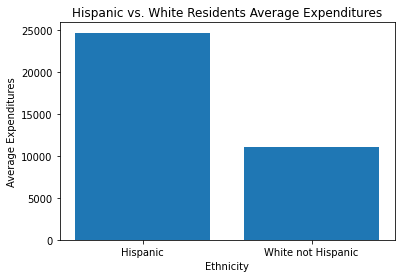

In [2]:
df_white_hispanic = df_dds[(df_dds["Ethnicity"] == "White not Hispanic") | 
                           (df_dds["Ethnicity"] == "Hispanic")]
means_by_eth = df_white_hispanic.groupby("Ethnicity")["Expenditures"].mean()
white_mean = means_by_eth["White not Hispanic"]
hisp_mean = means_by_eth["Hispanic"]
plt.bar(["Hispanic", "White not Hispanic"], [white_mean, hisp_mean])
plt.xlabel("Ethnicity")
plt.ylabel("Average Expenditures")
plt.title("Hispanic vs. White Residents Average Expenditures")



**YOUR EXPLANATION HERE**

**Hispanic average expenditures: 11,065.57 and White Average expenditures: $24,697.55. This makes it look like White people generally have higher expenditures compared to Hispanic people.**

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

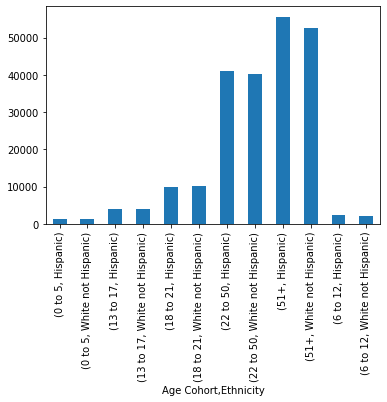

In [3]:
# YOUR CODE HERE
means = df_white_hispanic.groupby(["Age Cohort", 
                                   "Ethnicity"])["Expenditures"].mean()
means.plot.bar()

**YOUR EXPLANATION HERE**

**Now when we look at the data we see that the spending per age group is roughly the same and it is likely that we have a different distribution of ages among these two ethnicities. My predicition is that Hispanic group has younger has a lower age on average because that would bring the average Hispanic expenditures down as seen in questions 1.**

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

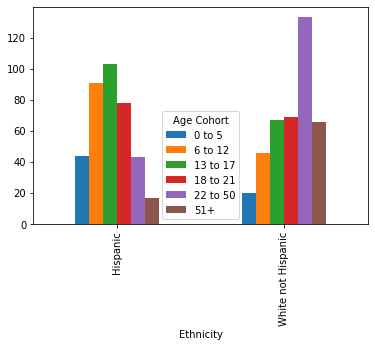

In [4]:
# YOUR CODE HERE (although you may want to add more code cells)
age_cat = df_white_hispanic["Age Cohort"].astype('category').cat.reorder_categories(['0 to 5', '6 to 12', '13 to 17', '18 to 21', '22 to 50', '51+'])
joint_eth_age = pd.crosstab(df_white_hispanic["Ethnicity"], age_cat)
joint_eth_age.plot.bar()

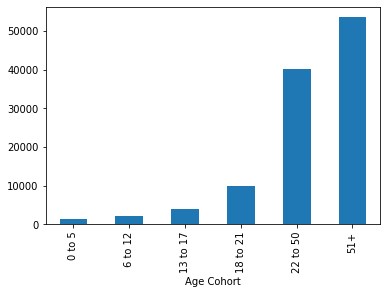

In [5]:
df_dds.groupby("Age Cohort")["Expenditures"].mean().sort_values().plot.bar()

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

It looks like Simpson's Paradox is at play here. Although the average amount of expenditures given is much higher for the White group compared to the Hispanic group, it seems like per age group, the amount is about the same. Since the White group has a much higher proportion of older people, and older people tend to get higher expenditures, it inflates the average of the White group.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.